In [1]:
from sklearn import *
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn import cross_validation
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster
from sklearn import model_selection

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationW

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns #for graphics and figure styling
import pandas as pd

In [3]:
data = pd.read_csv('adult.data.txt', sep=", ", encoding='latin1', header=None)

C:\Users\Victoria\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [4]:
data.columns = ['Age', 'Status', 'Weight', 'Degree', 'Education', 'Married', 'Occupation', 'Relationship', 'Race', 'Sex', 'Gain', 'Loss', 'Hours', 'Country', 'Income']

In [5]:
data.head()

,Age,Status,Weight,Degree,Education,Married,Occupation,Relationship,Race,Sex,Gain,Loss,Hours,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age             32561 non-null int64
Status          32561 non-null object
Weight          32561 non-null int64
Degree          32561 non-null object
Education       32561 non-null int64
Married         32561 non-null object
Occupation      32561 non-null object
Relationship    32561 non-null object
Race            32561 non-null object
Sex             32561 non-null object
Gain            32561 non-null int64
Loss            32561 non-null int64
Hours           32561 non-null int64
Country         32561 non-null object
Income          32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
data = data.apply(LabelEncoder().fit_transform)

In [9]:
dataIncomeColumn = data.Income

In [10]:
dataIncomeColumn.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int64

In [11]:
data= data.drop('Income', axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)

In [13]:
data

,Age,Status,Weight,Degree,Education,Married,Occupation,Relationship,Race,Sex,Gain,Loss,Hours,Country
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5
5,20,4,17700,12,13,2,4,5,4,0,0,0,39,39
6,32,4,8536,6,4,3,8,1,2,0,0,0,15,23
7,35,6,13620,11,8,2,4,0,4,1,0,0,44,39
8,14,4,1318,12,13,4,10,1,4,0,105,0,49,39
9,25,4,8460,9,12,2,4,0,4,1,79,0,39,39


In [14]:
standardized_data = scaler.transform(data)

In [15]:
data_Test = pd.read_csv('adult.test.txt', sep=", ", encoding='latin1', header=None)
data_Test.columns = ['Age', 'Status', 'Weight', 'Degree', 'Education', 'Married', 'Occupation', 'Relationship', 'Race', 'Sex', 'Gain', 'Loss', 'Hours', 'Country', 'Income']
enc = LabelEncoder()
data_Test = data_Test.apply(LabelEncoder().fit_transform)
data_TestIncomeColumn = data_Test.Income
data_Test=data_Test.drop('Income', axis=1)

C:\Users\Victoria\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [24]:
data_Test

,Age,Status,Weight,Degree,Education,Married,Occupation,Relationship,Race,Sex,Gain,Loss,Hours,Country
0,8,4,8931,1,6,4,7,3,2,1,0,0,39,38
1,21,4,1888,11,8,2,5,0,4,1,0,0,49,38
2,11,2,11540,7,11,2,11,0,4,1,0,0,39,38
3,27,4,5146,15,9,2,7,0,2,1,90,0,39,38
4,1,0,2450,15,9,4,0,3,4,0,0,0,29,38
5,17,4,7627,0,5,4,8,1,4,1,0,0,29,38
6,12,0,8942,11,8,4,0,4,2,1,0,0,39,38
7,46,6,2523,14,14,2,10,0,4,1,46,0,31,38
8,7,4,11968,15,9,4,8,4,4,0,0,0,39,38
9,38,4,2544,5,3,2,3,0,4,1,0,0,9,38


In [16]:
data_TestIncomeColumn.head()

0    0
1    0
2    1
3    1
4    0
Name: Income, dtype: int64

In [17]:
standardized_test_data = scaler.transform(data_Test)

In [18]:
standardized_test_data

array([[-0.99596883,  0.09005041, -0.25920377, ..., -0.20417671,
        -0.03112174,  0.16375118],
       [-0.04256059,  0.09005041, -1.42355156, ..., -0.20417671,
         0.79234242,  0.16375118],
       [-0.77595154, -1.28363502,  0.17211575, ..., -0.20417671,
        -0.03112174,  0.16375118],
       ...,
       [-0.04256059,  0.09005041,  0.25047737, ..., -0.20417671,
         0.79234242,  0.16375118],
       [ 0.39747397,  0.09005041, -1.45165594, ..., -0.20417671,
        -0.03112174,  0.16375118],
       [-0.26257788,  0.77689313, -0.65778996, ..., -0.20417671,
         1.61580658,  0.16375118]])

In [19]:
a=0
b=0
for col in data:
    for i in data[col].isnull():
        if i:
            a+=1
        b+=1
    print('Missing data in',col,'is',a/b*100,'%')
    a=0
    b=0
##check for missing data 
##so now, we have standardized_data and standardized_test_data that we can run our models on

Missing data in Age is 0.0 %
Missing data in Status is 0.0 %
Missing data in Weight is 0.0 %
Missing data in Degree is 0.0 %
Missing data in Education is 0.0 %
Missing data in Married is 0.0 %
Missing data in Occupation is 0.0 %
Missing data in Relationship is 0.0 %
Missing data in Race is 0.0 %
Missing data in Sex is 0.0 %
Missing data in Gain is 0.0 %
Missing data in Loss is 0.0 %
Missing data in Hours is 0.0 %
Missing data in Country is 0.0 %


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
censusIDM = RandomForestClassifier(max_depth=3, random_state=0)
from sklearn.feature_selection import RFE
rfe = RFE(censusIDM, n_features_to_select=6)
rfe.fit(standardized_data, dataIncomeColumn)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
  n_features_to_select=6, step=1, verbose=0)

In [21]:
rfe.ranking_

array([1, 6, 9, 2, 1, 1, 5, 1, 8, 3, 1, 4, 1, 7])

In [22]:
predict_TestOutput=rfe.predict(standardized_test_data)
predictOutput=rfe.predict(standardized_data)
#standardized_data for the training

In [23]:
goodTest=(predict_TestOutput==data_TestIncomeColumn).sum();print(goodTest)
good=(predictOutput==dataIncomeColumn).sum();print(good)
#good=(predictOutput==dataIncomeColumn).sum();good - for training error#

13606
27347


In [24]:
badTest=(predict_TestOutput!=data_TestIncomeColumn).sum();print(badTest)
bad=(predictOutput!=dataIncomeColumn).sum();print(bad)

2675
5214


In [25]:
good/(good+bad)*100

83.98697828690766

In [27]:
goodTest/(goodTest+badTest)*100

83.56980529451508

In [28]:
#Using the Random Forest Classifier on our Data, with depth 3.
censusIDM = RandomForestClassifier(max_depth=3, random_state=0)
frfe = RFE(censusIDM, n_features_to_select=3)
frfe.fit(standardized_data, dataIncomeColumn)
print(frfe.ranking_)
predict_TestOutput=frfe.predict(standardized_test_data)
predictOutput=frfe.predict(standardized_data)
goodTest=(predict_TestOutput==data_TestIncomeColumn).sum();print(goodTest)
good=(predictOutput==dataIncomeColumn).sum();print(good)
badTest=(predict_TestOutput!=data_TestIncomeColumn).sum();print(badTest)
bad=(predictOutput!=dataIncomeColumn).sum();print(bad)

[ 3  9 12  5  1  2  8  1 11  6  1  7  4 10]
13623
27354
2658
5207


In [29]:
#Using the Random Forest Classifier on our Data, with depth 7.
censusIDM = RandomForestClassifier(max_depth=7, random_state=0)
frfe = RFE(censusIDM, n_features_to_select=3)
frfe.fit(standardized_data, dataIncomeColumn)
print(frfe.ranking_)
predict_TestOutput=frfe.predict(standardized_test_data)
predictOutput=frfe.predict(standardized_data)
goodTest=(predict_TestOutput==data_TestIncomeColumn).sum();print(goodTest)
good=(predictOutput==dataIncomeColumn).sum();print(good)
badTest=(predict_TestOutput!=data_TestIncomeColumn).sum();print(badTest)
bad=(predictOutput!=dataIncomeColumn).sum();print(bad)

[ 4 10  9  5  1  2  7  1 12  8  1  3  6 11]
13670
27656
2611
4905


In [30]:
#Testing the Linear Regression Model on a large numer of different features to select to see if the accuracy changes significantly or not
from sklearn.linear_model import LinearRegression
beerIDM = linear_model.LogisticRegression()
rfe2 = RFE(beerIDM, n_features_to_select=4)
rfe2.fit(standardized_data, dataIncomeColumn)
print(rfe2.ranking_)
predict_TestOutput=rfe2.predict(standardized_test_data)
predictOutput=rfe2.predict(standardized_data)
goodTest=(predict_TestOutput==data_TestIncomeColumn).sum();print(goodTest)
good=(predictOutput==dataIncomeColumn).sum();print(good)
badTest=(predict_TestOutput!=data_TestIncomeColumn).sum();print(badTest)
bad=(predictOutput!=dataIncomeColumn).sum();print(bad)
good/(good+bad)

[ 1 10  8  7  1  3  9  5  6  1  1  4  2 11]
13258
26575
3023
5986


0.8161604373330057

In [23]:
n=50
precision=[0]*n
for i in range(1,n+1):
    censusIDM = RandomForestClassifier(max_depth=i, random_state=0)
    rfe = RFE(censusIDM, n_features_to_select=4)
    rfe.fit(standardized_data, dataIncomeColumn)
    predict_TestOutput=rfe.predict(standardized_test_data)
    predictOutput=rfe.predict(standardized_data)
    #Predictive Accuracy
    goodTest=(predict_TestOutput==data_TestIncomeColumn).sum();
    good=(predictOutput==dataIncomeColumn).sum();
    badTest=(predict_TestOutput!=data_TestIncomeColumn).sum();
    bad=(predictOutput!=dataIncomeColumn).sum();
    precision[i-1]=good/(good+bad);


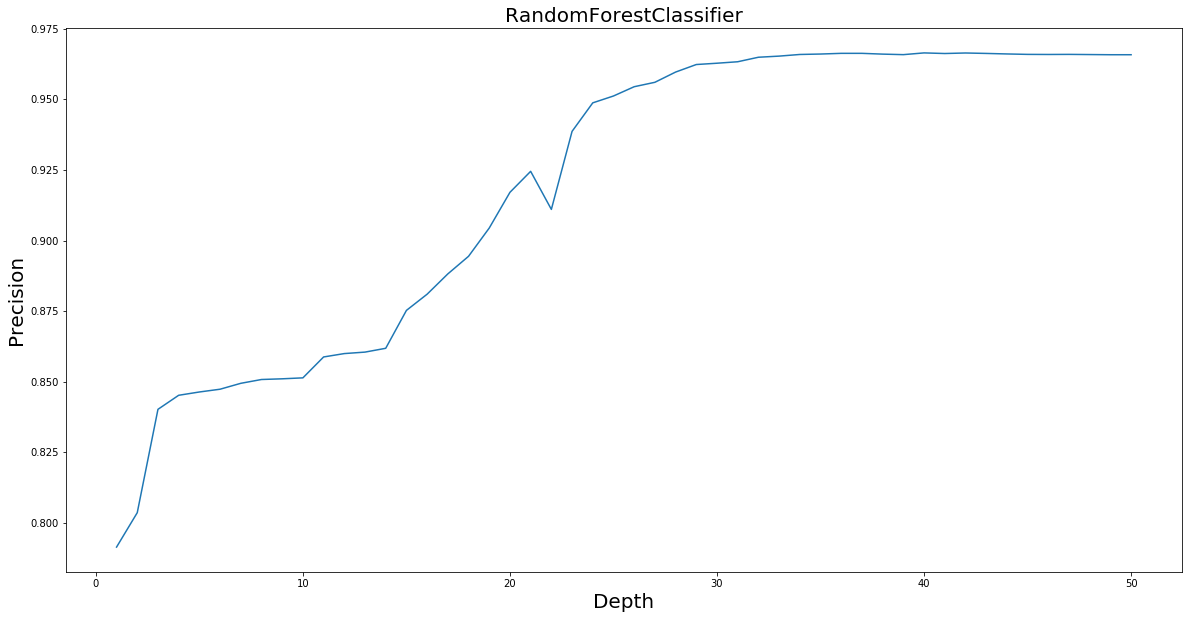

In [25]:
fig=plt.figure(figsize=[20,10])
plt.plot(range(1,n+1),precision)
plt.xlabel('Depth', fontsize=20)
plt.ylabel('Precision', fontsize=20)
plt.title('RandomForestClassifier', fontsize=20)
fig.savefig('RandomForest2.pdf',dpi=200)

In [51]:
#Linear Model Lasso curently not working.
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
rfe = RFE(clf, n_features_to_select=4)
rfe.fit(standardized_data, dataIncomeColumn)
print(rfe.ranking_)
predict_TestOutput=rfe.predict(standardized_test_data)
predictOutput=rfe.predict(standardized_data)
#Predictive Accuracy
goodTest=(predict_TestOutput==data_TestIncomeColumn).sum();print(goodTest)
good=(predictOutput==dataIncomeColumn).sum();print(good)
badTest=(predict_TestOutput!=data_TestIncomeColumn).sum();print(badTest)
bad=(predictOutput!=dataIncomeColumn).sum();print(bad)



[11 10  9  8  7  6  5  4  3  2  1  1  1  1]
0
0
16281
32561


In [34]:
#Running the Perceptron Model on our data
from sklearn.linear_model import Perceptron
clf = linear_model.Perceptron()
rfe = RFE(clf, n_features_to_select=4)
rfe.fit(standardized_data, dataIncomeColumn)
print(rfe.ranking_)
predict_TestOutput=rfe.predict(standardized_test_data)
predictOutput=rfe.predict(standardized_data)
#Predictive Accuracy
goodTest=(predict_TestOutput==data_TestIncomeColumn).sum();print(goodTest)
good=(predictOutput==dataIncomeColumn).sum();print(good)
badTest=(predict_TestOutput!=data_TestIncomeColumn).sum();print(badTest)
bad=(predictOutput!=dataIncomeColumn).sum();print(bad)

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Victoria\Anaconda3\lib\site-packages\skle

[ 4 11  1 10  2  5  8  6  3  1  1  1  7  9]
12944
25157
3337
7404


C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [26]:
standardized_data2 = pd.DataFrame(standardized_data)
standardized_test_data2 = pd.DataFrame(standardized_test_data)
standardizedFrames = [standardized_data2, standardized_test_data2]
standardizedResult = pd.concat(standardizedFrames)
dataIncomeColumn2 = pd.DataFrame(dataIncomeColumn)
data_TestIncomeColumn2 = pd.DataFrame(data_TestIncomeColumn)
combinedIncomeColumn = [dataIncomeColumn2, data_TestIncomeColumn2]
combinedResult = pd.concat(combinedIncomeColumn)                      

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
#where L is in the loop
rng = np.random.RandomState(42)
yy = []

heldout = [0.95, 0.90, .85, .8, 0.75, .7, .65, 0.6, .55, 0.5, 0.45, 0.4, 0.35, .3, .25, .2, .15, .1, .05, 0.01]
xx = 1. - np.array(heldout)
rounds = 20
for i in heldout:
    yy_ = []
    for r in range(rounds):
        #clf = SGDClassifier()
        clf = SVR(kernel="linear")
        standardized_dataL, standardized_test_dataL, dataIncomeColumnL, data_TestIncomeColumnL = \
            train_test_split(standardizedResult, combinedResult, test_size=i, random_state=rng)
        clf.fit(standardized_dataL, dataIncomeColumnL)
        y_pred = clf.predict(standardized_test_dataL)
        yy_.append(1 - sum(y_pred == data_TestIncomeColumnL.Income)/len(y_pred))
    yy.append(np.mean(yy_))
plt.plot(xx, yy, label='Linear Regression')

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


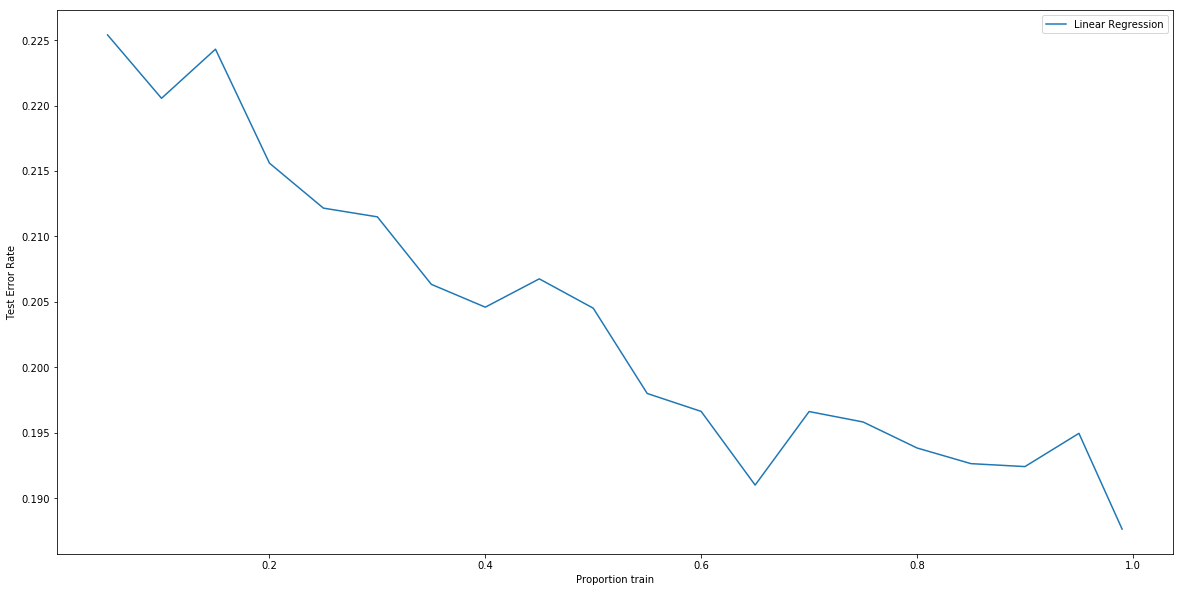

In [91]:

fig=plt.figure(figsize=[20,10])
plt.plot(xx, yy, label='Linear Regression')
plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()
fig.savefig('test2png.pdf', dpi=100)

In [89]:
xx,yy

(array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 0.99]),
 [0.22539978448275866,
  0.22055484780927248,
  0.22430870026014066,
  0.21559860776987255,
  0.2121601332168596,
  0.21149312664521785,
  0.20633425727604887,
  0.2045895038558657,
  0.20675439249553307,
  0.2045125097252365,
  0.1979935392875017,
  0.19662179454368633,
  0.1909915179877157,
  0.19661161536886645,
  0.1958152485463926,
  0.1938274132459822,
  0.19262999863518493,
  0.19240532241555783,
  0.1949447400736799,
  0.18762781186094069])

In [128]:
#k-nearest Neighbors
from sklearn.neighbors import NearestNeighbors
clf = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(standardized_data)
predict_TestOutput=clf.predict(standardized_test_data)
predictOutput=clf.predict(standardized_data)
#Predictive Accuracy
goodTest=(predict_TestOutput==data_TestIncomeColumn).sum();print(goodTest)
good=(predictOutput==dataIncomeColumn).sum();print(good)
badTest=(predict_TestOutput!=data_TestIncomeColumn).sum();print(badTest)
bad=(predictOutput!=dataIncomeColumn).sum();print(bad)

AttributeError: 'NearestNeighbors' object has no attribute 'predict'

In [129]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(verbose=0, random_state=0)
mlp.fit(standardized_data, dataIncomeColumn)
predict_TestOutput=mlp.predict(standardized_test_data)
predictOutput=mlp.predict(standardized_data)
#Predictive Accuracy
goodTest=(predict_TestOutput==data_TestIncomeColumn).sum();print(goodTest)
good=(predictOutput==dataIncomeColumn).sum();print(good)
badTest=(predict_TestOutput!=data_TestIncomeColumn).sum();print(badTest)
bad=(predictOutput!=dataIncomeColumn).sum();print(bad)

13867
28048
2414
4513


In [22]:
#SVM
from sklearn.svm import SVR
clf = SVR(kernel="linear")
rfe4 = RFE(clf, n_features_to_select=5)
rfe4.fit(standardized_data, dataIncomeColumn)
predict_TestOutput=rfe.predict(standardized_test_data)
predictOutput=rfe.predict(standardized_data)
#Predictive Accuracy
goodTest=(predict_TestOutput==data_TestIncomeColumn).sum();print(goodTest)
good=(predictOutput==dataIncomeColumn).sum();print(good)
badTest=(predict_TestOutput!=data_TestIncomeColumn).sum();print(badTest)
bad=(predictOutput!=dataIncomeColumn).sum();print(bad)

13606
27347
2675
5214


C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

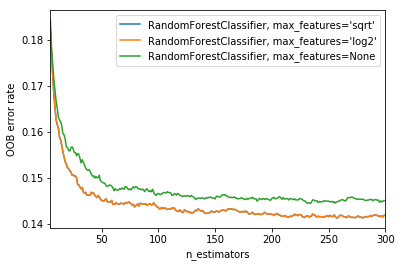

In [27]:
#Running The Random Forest OOB Error Rate Chart
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
RANDOM_STATE = 123
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, max_features='sqrt',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 300

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(standardized_data, dataIncomeColumn)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

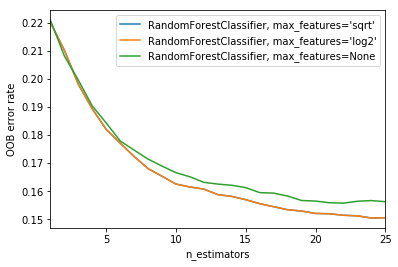

In [106]:
#Running The Extra Trees OOB Error Rate Chart
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
RANDOM_STATE = 123
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, max_features='sqrt',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 1
max_estimators = 25

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(standardized_data, dataIncomeColumn)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
xss=[0]*3
yss=[0]*3
i=0
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    xss[i]=xs
    yss[i]=ys
    i=i+1
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

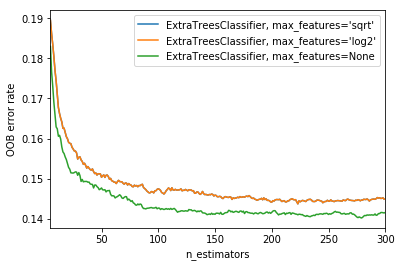

In [127]:
#Running The Extra Trees OOB Error Rate Chart
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
RANDOM_STATE = 123
ensemble_clfs = [
    ("ExtraTreesClassifier, max_features='sqrt'",
        ExtraTreesClassifier(warm_start=True, max_features='sqrt',
                               oob_score=True, bootstrap=True,
                               random_state=RANDOM_STATE)),
    ("ExtraTreesClassifier, max_features='log2'",
        ExtraTreesClassifier(warm_start=True, max_features='log2',
                               oob_score=True, bootstrap=True,
                               random_state=RANDOM_STATE)),
    ("ExtraTreesClassifier, max_features=None",
        ExtraTreesClassifier(warm_start=True, max_features=None,
                               oob_score=True, bootstrap=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 300

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(standardized_data, dataIncomeColumn)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
xss=[0]*3
yss=[0]*3
i=0
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    xss[i]=xs
    yss[i]=ys
    i=i+1
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

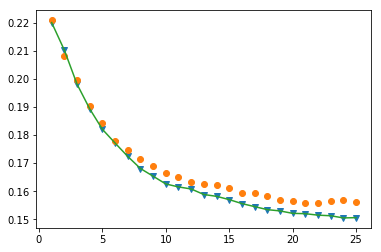

In [121]:
plt.plot(xss[0],yss[0],'v');
plt.plot(xss[2],yss[2],'o');
plt.plot(xss[1],yss[1],'-')


In [109]:
yss=np.asarray(yss)
xss=np.asarray(xss)

In [118]:
help(plt.plot
    )

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

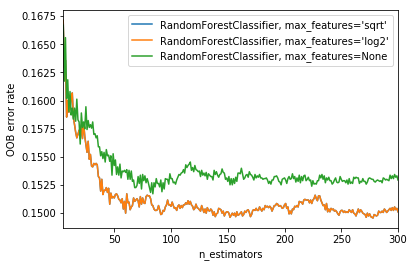

In [29]:
#Running The Random Forest OOB Error Rate Chart
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
RANDOM_STATE = 123
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, max_features='sqrt',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 300

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(standardized_data, dataIncomeColumn)

        # Record the OOB error for each `n_estimators=i` setting.
        y_pred = clf.predict(standardized_test_data)
        test_errorCLF = (1 - sum(y_pred == data_TestIncomeColumn)/len(y_pred))
        error_rate[label].append((i, test_errorCLF))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

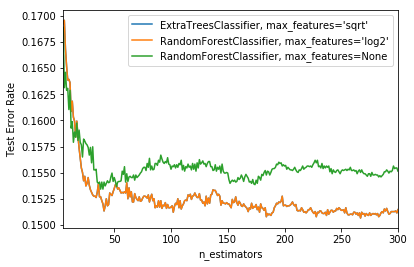

In [124]:
#Running The Extra Trees Test Error Plot
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
RANDOM_STATE = 123
ensemble_clfs = [
    ("ExtraTreesClassifier, max_features='sqrt'",
        ExtraTreesClassifier(warm_start=True, max_features='sqrt',
                               oob_score=True, bootstrap=True,
                               random_state=RANDOM_STATE)),
    ("ExtraTreesClassifier, max_features='log2'",
        ExtraTreesClassifier(warm_start=True, max_features='log2',
                               oob_score=True, bootstrap=True,
                               random_state=RANDOM_STATE)),
    ("ExtraTrees, max_features=None",
        ExtraTreesClassifier(warm_start=True, max_features=None,
                               oob_score=True, bootstrap=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 300

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(standardized_data, dataIncomeColumn)

        # Record the OOB error for each `n_estimators=i` setting.
        y_pred = clf.predict(standardized_test_data)
        test_errorCLF = (1 - sum(y_pred == data_TestIncomeColumn)/len(y_pred))
        error_rate[label].append((i, test_errorCLF))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("Test Error Rate")
plt.legend(loc="upper right")
plt.show()

In [32]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
RANDOM_STATE = 123
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, max_features='sqrt',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 20
max_estimators = 30

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(standardized_data, dataIncomeColumn)

        # Record the OOB error for each `n_estimators=i` setting.
        y_pred = clf.predict(standardized_test_data)
        test_errorCLF = (1 - sum(y_pred == data_TestIncomeColumn)/len(y_pred))
        error_rate[label].append((i, test_errorCLF))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("Test error rate")
plt.legend(loc="upper right")
plt.show()

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. T

TypeError: zip argument #1 must support iteration